In [15]:
from datasets import load_dataset
from transformers import AutoTokenizer
import statistics

""" 
This script calculates the mean, median, minimum, maximum, and standard deviation of the number of tokens in the test set of the PG-19 dataset.
"""
# Load the dataset
dataset = load_dataset("emozilla/pg19-test")
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-2-7b-hf')
textbook_token_nums = []
# Explore the dataset
for book in dataset['test']['text']:
    encodings = tokenizer(book, return_tensors="pt")
    textbook_token_nums.append(encodings.input_ids.size(1))

# Explore the dataset
mean = statistics.mean(textbook_token_nums)
median = statistics.median(textbook_token_nums)
minimum = min(textbook_token_nums)
maximum = max(textbook_token_nums)
std_dev = statistics.stdev(textbook_token_nums)

# Print the results
print("Number of books in the test set of the PG-19 dataset:", len(textbook_token_nums))
print("Number of tokens in the test set of the PG-19 dataset:", sum(textbook_token_nums))
print("Mean", mean)
print("Median:", median)
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Standard Deviation:", std_dev)
  


Number of books in the test set of the PG-19 dataset: 100
Number of tokens in the test set of the PG-19 dataset: 11337755
Mean 113377.55
Median: 80243.0
Minimum: 3918
Maximum: 1323654
Standard Deviation: 156358.41710022645


## PG-19 Datset Intro
100 test books.

example: https://www.gutenberg.org/cache/epub/10146/pg10146-images.html

The mean token number for each book is 113k.

The median is 80k.


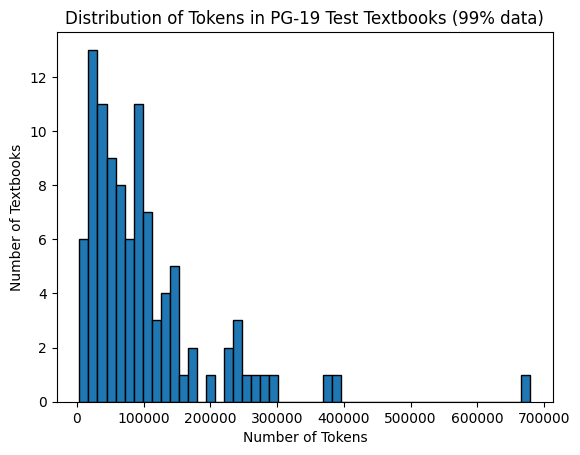

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Remove top 1% as outliers
threshold = np.percentile(textbook_token_nums, 99)
filtered_counts = [count for count in textbook_token_nums if count <= threshold]

plt.hist(filtered_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Textbooks')
plt.title('Distribution of Tokens in PG-19 Test Textbooks (99% data)')
plt.grid(False)
plt.show()



## WikiText-2 Dataset Intro
Merge all data from wikitext-2 into one dataset
the length is 341k tokens

In [22]:
# statistics for the WikiText-2 dataset
# PPL Calculation by Hugging Face: https://huggingface.co/docs/transformers/en/perplexity
from datasets import load_dataset

test = load_dataset("wikitext", "wikitext-2-raw-v1", split="test")
print("Number of examples in the test set of the WikiText-2 dataset:", len(test))
encodings = tokenizer("\n\n".join(test["text"]), return_tensors="pt")
print("Number of tokens in the test set of the WikiText-2 dataset:", encodings.input_ids.size(1))

Number of examples in the test set of the WikiText-2 dataset: 4358
Number of tokens in the test set of the WikiText-2 dataset: 341469


In [1]:
from perplexity import compute_perplexity_sliding_window
import SelfExtend 
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer
import torch
from datasets import load_dataset

test = load_dataset("wikitext", "wikitext-2-raw-v1", split="test")


model_name = "meta-llama/Llama-2-7b-chat-hf"
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.bfloat16, attn_implementation="flash_attention_2")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)

encodings = tokenizer("\n\n".join(test["text"]), return_tensors="pt")


print("no SelfExtend")
print("model_name:", model_name)
print("context_max_length:", 4096)
ppl = compute_perplexity_sliding_window(model, encodings, context_max_length=4096)

print("model_name:", model_name)
print("context_max_length:", 8192)
ppl = compute_perplexity_sliding_window(model, encodings, context_max_length=8192)


print("--------------------")
print("Using SelfExtend")
SelfExtend.apply(model, group_size = 32, window_size = 1024, enable_flash_attention=True)

print("model_name: self extended ", model_name)
print("context_max_length:", 4096)
ppl = compute_perplexity_sliding_window(model, encodings, context_max_length=4096)


print("model_name: self extended ", model_name)
print("context_max_length:", 8192)
ppl = compute_perplexity_sliding_window(model, encodings, context_max_length=8192)

print("model_name: self extended ", model_name)
print("context_max_length:", 12288)
ppl = compute_perplexity_sliding_window(model, encodings, context_max_length=12288)


print("model_name: self extended ", model_name)
print("context_max_length:", 16384)
ppl = compute_perplexity_sliding_window(model, encodings, context_max_length=16384)


/home/jr151/.conda/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.
Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


no SelfExtend
model_name: meta-llama/Llama-2-7b-chat-hf
context_max_length: 4096


 99%|█████████▉| 659/667 [03:16<00:02,  3.35it/s]


Time taken: 196.76 seconds
PPL: 6.10
GPU Memory Used: 15.11 GB
model_name: meta-llama/Llama-2-7b-chat-hf
context_max_length: 8192


 98%|█████████▊| 651/667 [06:40<00:09,  1.62it/s]


Time taken: 401.41 seconds
PPL: 8457.47
GPU Memory Used: 17.60 GB
--------------------
Using SelfExtend
model_name: self extended  meta-llama/Llama-2-7b-chat-hf
context_max_length: 4096


 99%|█████████▉| 659/667 [03:57<00:02,  2.77it/s]


Time taken: 237.52 seconds
PPL: 6.07
GPU Memory Used: 15.11 GB
model_name: self extended  meta-llama/Llama-2-7b-chat-hf
context_max_length: 8192


 98%|█████████▊| 651/667 [07:55<00:11,  1.37it/s]


Time taken: 475.94 seconds
PPL: 6.13
GPU Memory Used: 17.59 GB
model_name: self extended  meta-llama/Llama-2-7b-chat-hf
context_max_length: 12288


 96%|█████████▋| 643/667 [12:13<00:27,  1.14s/it]


Time taken: 733.76 seconds
PPL: 6.31
GPU Memory Used: 20.09 GB
model_name: self extended  meta-llama/Llama-2-7b-chat-hf
context_max_length: 16384


 80%|████████  | 535/667 [13:57<03:26,  1.57s/it]

## Perplexity of Llama on WikiText-2 with sliding window 

### No SelfExtend

- **Model Name:** meta-llama/Llama-2-7b-chat-hf
- **Context Max Length:** 4096
- **Time Taken:** 196.76 seconds
- **PPL:** 6.10
- **GPU Memory Used:** 15.11 GB

> 

- **Model Name:** meta-llama/Llama-2-7b-chat-hf
- **Context Max Length:** 8192
- **Time Taken:** 401.41 seconds
- **PPL:** 8457.47
- **GPU Memory Used:** 17.60 GB

---

### Using SelfExtend

- **Model Name:** self extended meta-llama/Llama-2-7b-chat-hf
- **Context Max Length:** 4096
- **Time Taken:** 237.52 seconds
- **PPL:** 6.07
- **GPU Memory Used:** 15.11 GB

> 

- **Model Name:** self extended meta-llama/Llama-2-7b-chat-hf
- **Context Max Length:** 8192
- **Time Taken:** 475.94 seconds
- **PPL:** 6.13
- **GPU Memory Used:** 17.59 GB

> 

- **Model Name:** self extended meta-llama/Llama-2-7b-chat-hf
- **Context Max Length:** 12288
- **Time Taken:** 733.76 seconds
- **PPL:** 6.31
- **GPU Memory Used:** 20.09 GB

> 

- **Model Name:** self extended meta-llama/Llama-2-7b-chat-hf
- **Context Max Length:** 16384
